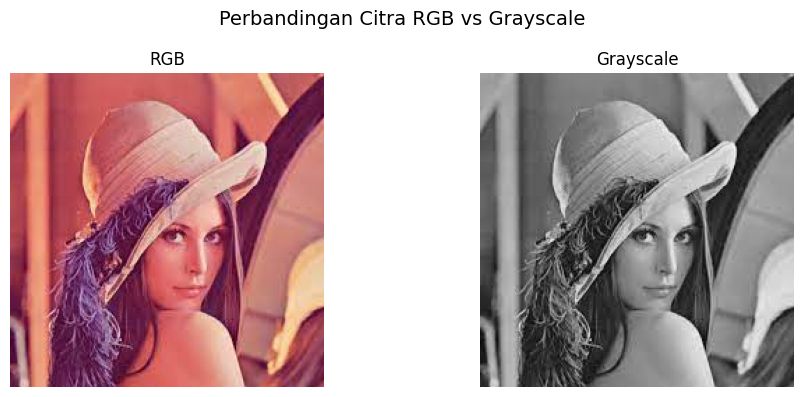

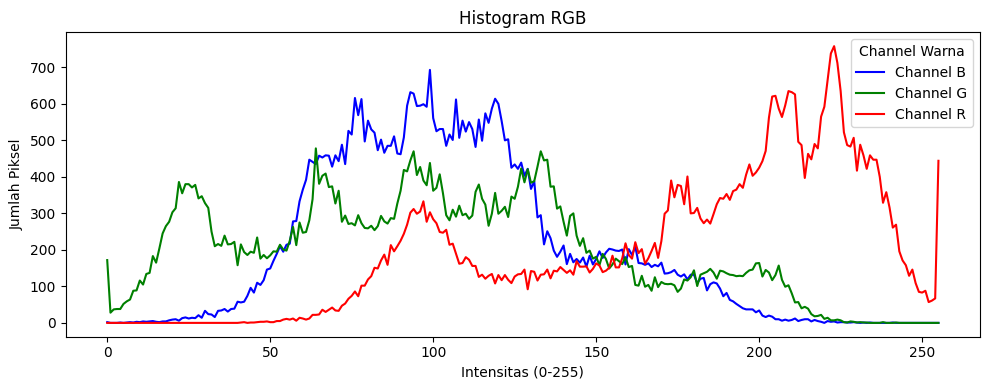

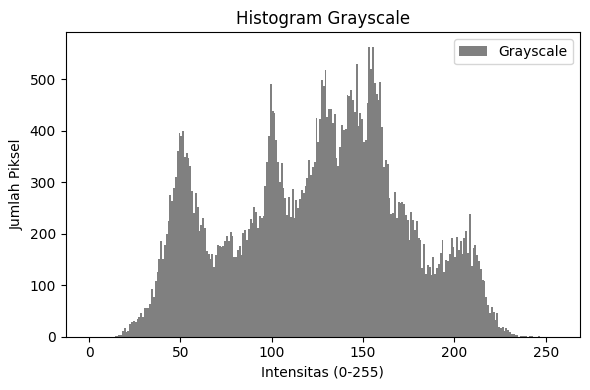

Height = 225, Width = 225
R = 179, G= 112, B= 163


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Baca citra
img = cv2.imread("lena.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tampilkan RGB dan Grayscale dengan legenda
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("RGB")
plt.xlabel("Gambar Berwarna (RGB)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.xlabel("Gambar Grayscale")
plt.axis('off')

plt.suptitle("Perbandingan Citra RGB vs Grayscale", fontsize=14)
plt.tight_layout()
plt.show()

# Histogram RGB dengan legenda
plt.figure(figsize=(10, 4))
colors = ('b', 'g', 'r')  # OpenCV: BGR
for i, c in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c, label=f'Channel {c.upper()}')
plt.title("Histogram RGB")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Piksel")
plt.legend(title="Channel Warna")
plt.tight_layout()
plt.show()

# Histogram Grayscale dengan label
plt.figure(figsize=(6, 4))
plt.hist(gray.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram Grayscale")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Piksel")
plt.legend(["Grayscale"], loc="upper right")  # legenda manual
plt.tight_layout()
plt.show()

h, w = img.shape[:2]
#jumlkah piksel
print("Height = {}, Width = {}" .format(h,w))

(B, G, R) = img[100, 100]
#Menampilkan jumlah piksel
print("R = {}, G= {}, B= {}".format(R,G,B))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


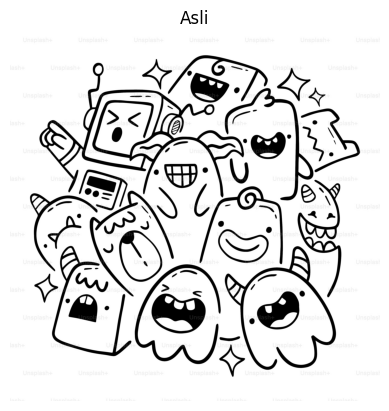

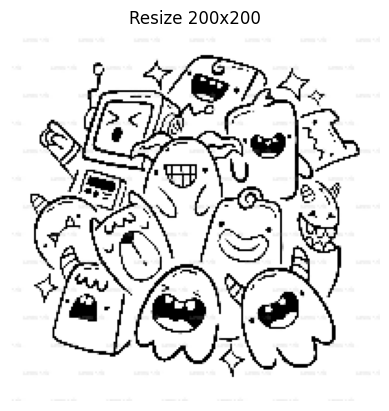

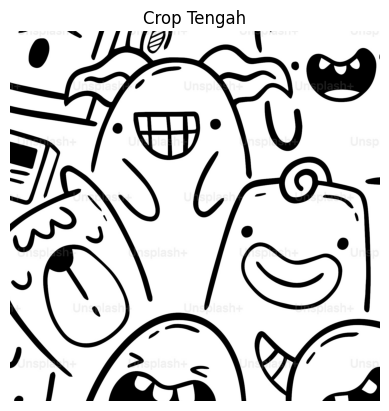

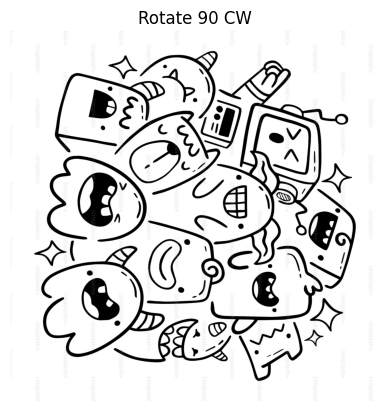

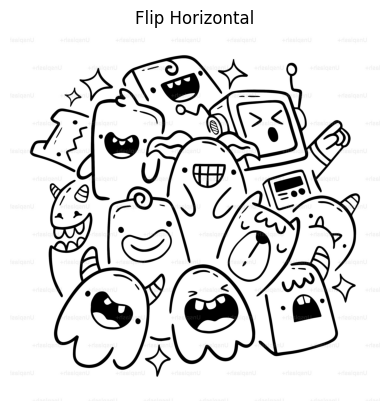

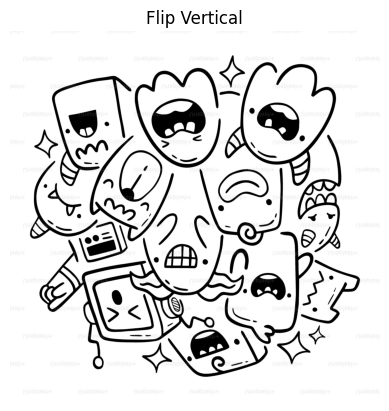

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar dari Google Drive
img_path = '/content/drive/MyDrive/Colab Notebooks/gambar/sample1.jpg'
img = cv2.imread(img_path)
assert img is not None, "Gambar sample.jpg tidak ditemukan di folder Drive."

h, w = img.shape[:2]

# Resize
resize = cv2.resize(img, (200,200))

# Crop (ambil tengah)
ch, cw = h//4, w//4
crop = img[ch:ch+h//2, cw:cw+w//2]

# Rotate 90 derajat searah jarum jam
rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

# Flip horizontal
flip_h = cv2.flip(img, 1)

# Flip vertical
flip_v = cv2.flip(img, 0)

# Fungsi untuk menampilkan gambar
def show(title, im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Tampilkan hasil transformasi
show("Asli", img)
show("Resize 200x200", resize)
show("Crop Tengah", crop)
show("Rotate 90 CW", rotate)
show("Flip Horizontal", flip_h)
show("Flip Vertical", flip_v)


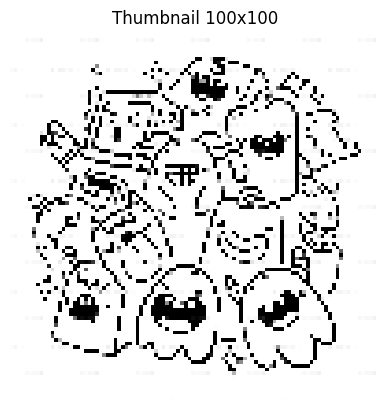

In [ ]:
thumbnail = cv2.resize(img, (100,100))
show("Thumbnail 100x100", thumbnail)

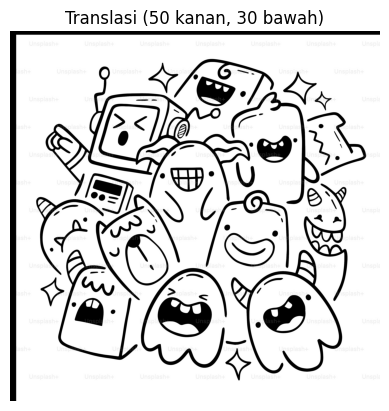

In [ ]:
tx, ty = 50, 30  # geser 50 piksel ke kanan dan 30 piksel ke bawah
M = np.float32([[1, 0, tx], [0, 1, ty]])
translate = cv2.warpAffine(img, M, (w, h))

show("Translasi (50 kanan, 30 bawah)", translate)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ======= Ganti path ini sesuai lokasi gambar kamu =======
img_path = '/content/drive/MyDrive/Colab Notebooks/gambar/sample4.jpg'

# Baca gambar
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("❌ Gambar tidak ditemukan. Cek path dan nama file kamu.")

In [ ]:
# Konversi BGR → RGB agar tampil benar di matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols = img.shape[:2]

# ====== 1. Translasi ======
M_translasi = np.float32([[1, 0, 100],
                          [0, 1, 50]])
translasi = cv2.warpAffine(img, M_translasi, (cols, rows))

# ====== 2. Rotasi ======
M_rotasi = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotasi = cv2.warpAffine(img, M_rotasi, (cols, rows))

# ====== 3. Scaling ======
resize = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# ====== 4. Flipping ======
flip_horizontal = cv2.flip(img, 1)
flip_vertical = cv2.flip(img, 0)
flip_both = cv2.flip(img, -1)

# ====== 5. Affine Transform ======
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(img, M_affine, (cols, rows))

# ====== 6. Perspective Transform ======
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M_perspective = cv2.getPerspectiveTransform(pts1, pts2)
perspective = cv2.warpPerspective(img, M_perspective, (300, 300))

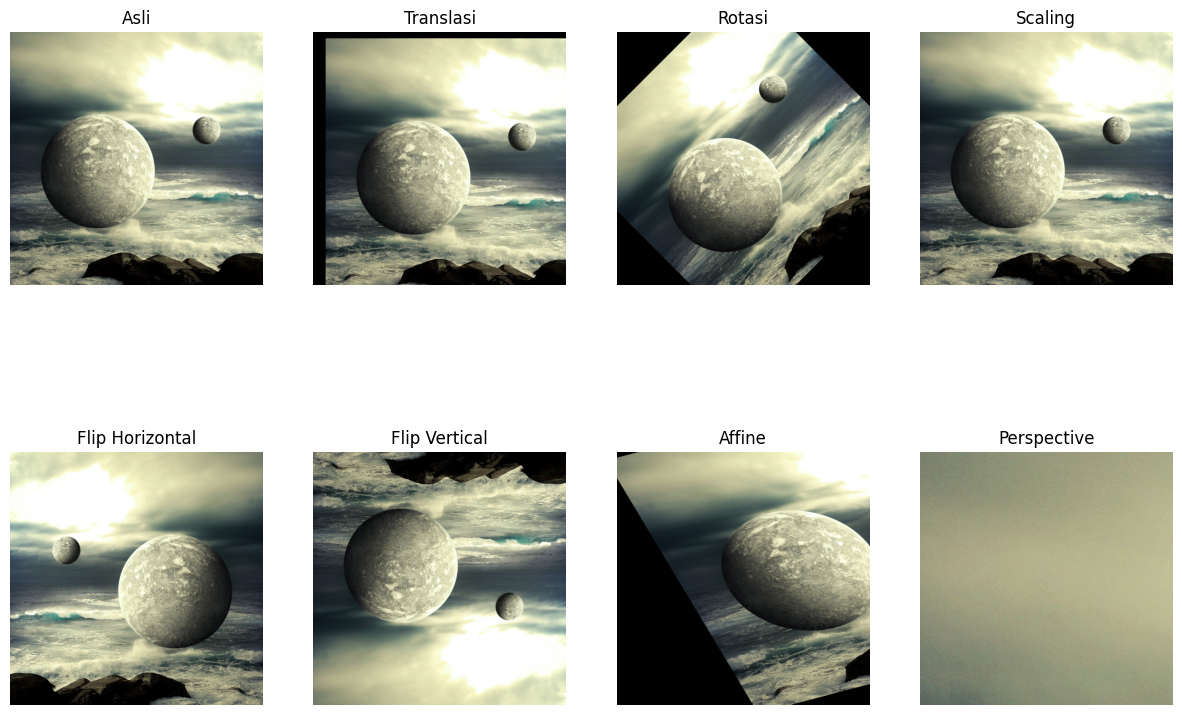

Height = 2000, Width = 2000
R = 114, G= 136, B= 134


In [ ]:
# ====== Tampilkan semua hasil ======
titles = ['Asli', 'Translasi', 'Rotasi', 'Scaling',
          'Flip Horizontal', 'Flip Vertical', 'Affine', 'Perspective']
images = [img, translasi, rotasi, resize, flip_horizontal, flip_vertical, affine, perspective]

plt.figure(figsize=(15,10))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()

h, w = img.shape[:2]
#jumlkah piksel
print("Height = {}, Width = {}" .format(h,w))

(B, G, R) = img[100, 100]
#Menampilkan jumlah piksel
print("R = {}, G= {}, B= {}".format(R,G,B))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


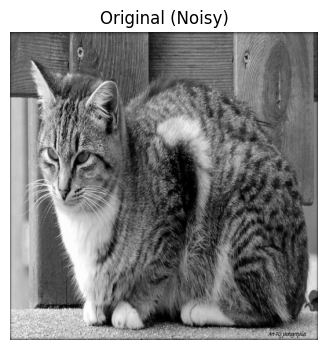

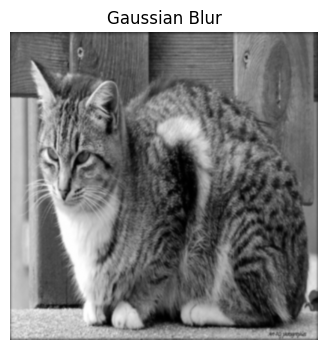

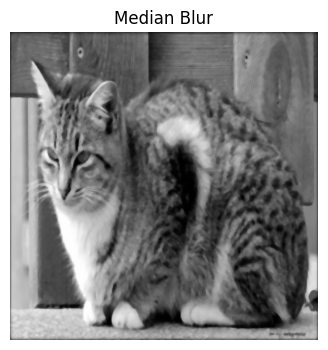

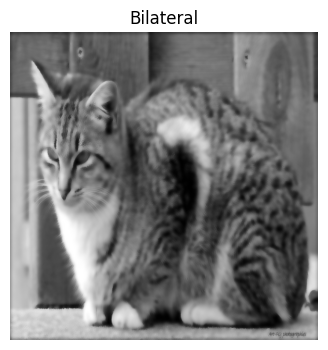

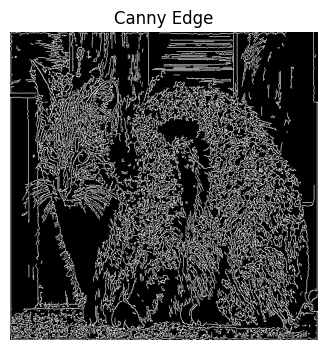

In [ ]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/gambar/noisy_image.jpg", 0)
assert img is not None, "noisy_image.jpg tidak ditemukan."

gauss = cv2.GaussianBlur(img, (5,5), 0)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
edges = cv2.Canny(img, 100, 200)

titles = ["Original (Noisy)", "Gaussian Blur", "Median Blur", "Bilateral", "Canny Edge"]
images = [img, gauss, median, bilateral, edges]

for t, im in zip(titles, images):
    plt.figure(figsize=(5,4))
    plt.imshow(im, cmap="gray")
    plt.title(t)
    plt.axis("off")
    plt.show()

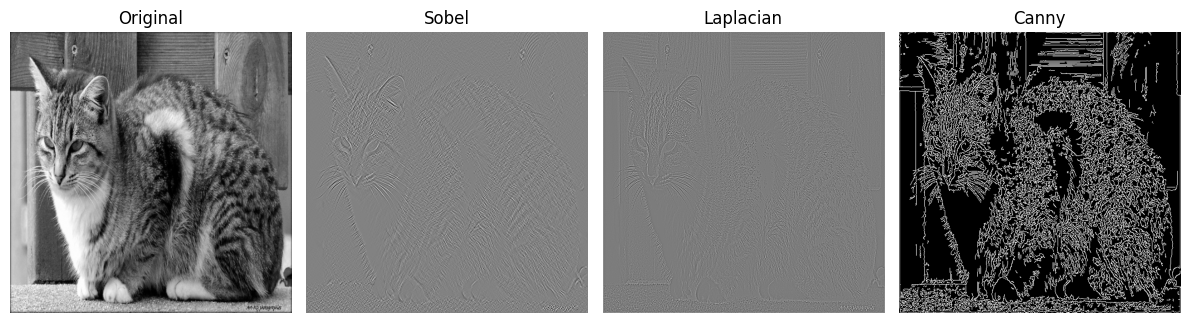

In [ ]:
# Apply edge detection methods
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
canny = cv2.Canny(img, 100, 200)

# Display
titles = ['Original', 'Sobel', 'Laplacian', 'Canny']
images = [img, sobel, laplacian, canny]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

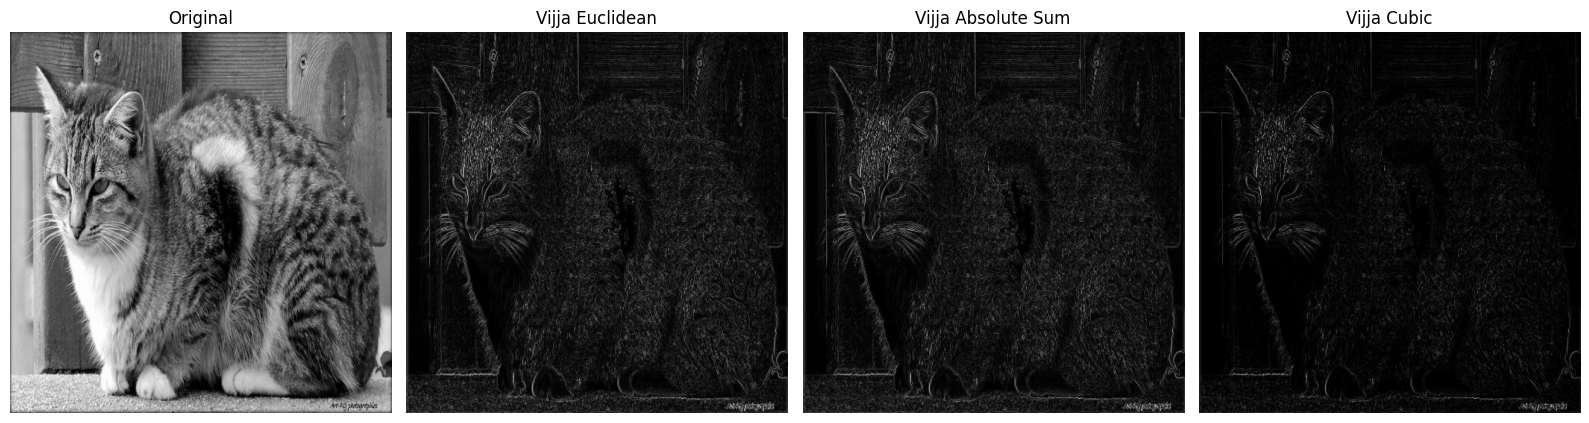

In [ ]:
# Kernel untuk deteksi tepi
vijja_cross_v = np.array([[2, 0],
                          [0, -2]])

vijja_cross_h = np.array([[0, 2],
                          [-2, 0]])

# Konvolusi dengan kernel vertikal dan horizontal
vijja_v = cv2.filter2D(img, cv2.CV_64F, vijja_cross_v)
vijja_h = cv2.filter2D(img, cv2.CV_64F, vijja_cross_h)

# Hitung magnitude dengan berbagai metode
# Metode 1: Euclidean distance (lebih umum dan stabil)
vijja_euclidean = np.sqrt(vijja_v**2 + vijja_h**2)

# Metode 2: Absolute sum (alternatif yang lebih sederhana)
vijja_abs = np.abs(vijja_v) + np.abs(vijja_h)

# Metode 3: Jika memang ingin pakai pangkat 3 (clipping diperlukan)
vijja_cubic = np.sqrt(np.abs(vijja_v)**3 + np.abs(vijja_h)**3)

def normalize(img):
    # Pastikan konversi ke float terlebih dahulu
    img_float = img.astype(np.float64)
    # Normalisasi ke range 0-255
    img_norm = cv2.normalize(img_float, None, 0, 255, cv2.NORM_MINMAX)
    return img_norm.astype(np.uint8)

results = {
    "Original": img,
    "Vijja Euclidean": normalize(vijja_euclidean),
    "Vijja Absolute Sum": normalize(vijja_abs),
    "Vijja Cubic": normalize(vijja_cubic)
}

# --- Display all methods side-by-side ---
plt.figure(figsize=(16, 10))
for i, (name, image) in enumerate(results.items()):
    plt.subplot(2, 4, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


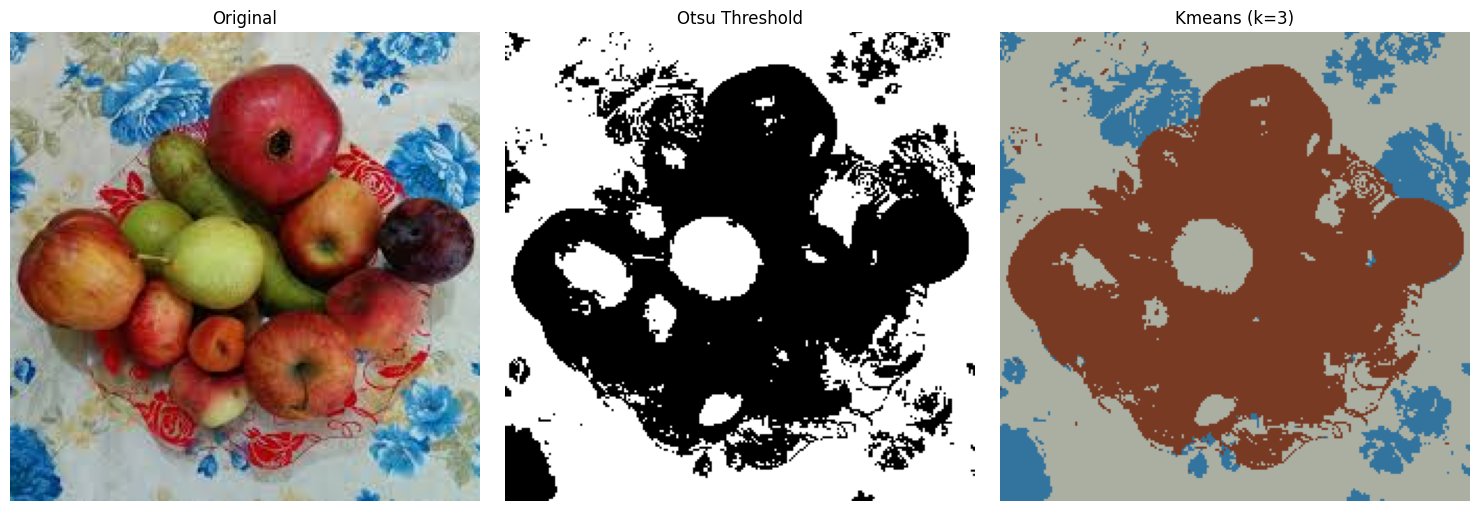

In [ ]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/gambar/buah.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold otsu
otsu, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# K-means clustering
Z = img.reshape((-1,3)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
compactness, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
seg = centers[labels.flatten()].reshape(img.shape).astype(np.uint8)

plt.figure(figsize=[15,5])
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(th, cmap='gray'), plt.title('Otsu Threshold'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)), plt.title('Kmeans (k=3)'), plt.axis('off')
plt.tight_layout()
plt.show()


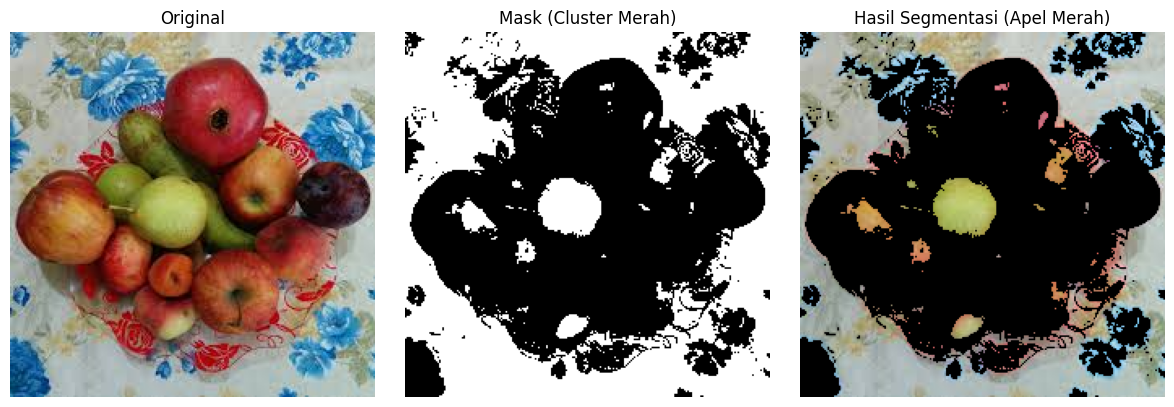

In [ ]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load image
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/gambar/buah.jpg")
assert img is not None, "Gambar tidak ditemukan!"
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Ubah gambar menjadi bentuk data 2D (untuk K-Means)
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# 3. Tentukan kriteria dan jumlah cluster (misal k=3)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
compactness, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 4. Ubah hasil clustering ke bentuk gambar
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((img.shape))

# 5. Temukan cluster dengan warna paling merah
# Nilai channel R (indeks 2) paling tinggi → dianggap sebagai apel merah
red_cluster = np.argmax(centers[:, 2])

# 6. Buat mask berdasarkan cluster merah
mask = (labels.flatten() == red_cluster).astype(np.uint8)
mask = mask.reshape((img.shape[:2])) * 255

# 7. Terapkan mask ke gambar asli
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# 8. Tampilkan hasil
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title('Mask (Cluster Merah)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(result)
plt.title('Hasil Segmentasi (Apel Merah)')
plt.axis('off')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


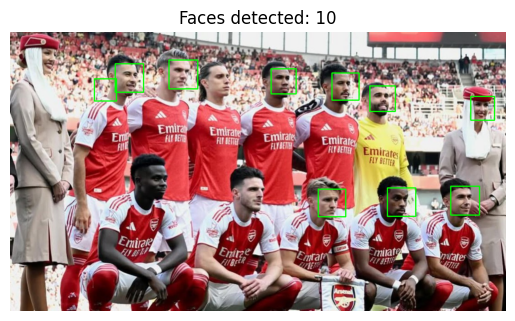

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Catatan: ganti "people.jpg" dengan foto berisi wajah nyata untuk hasil yang baik
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/gambar/104.jpg')
assert img is not None, "people.jpg tidak ditemukan (placeholder). Ganti dengan foto manusia untuk deteksi yang akurat."

# Konversi gambar ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load classifier deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Gambar kotak di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Tampilkan hasil
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Faces detected: {len(faces)}')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00


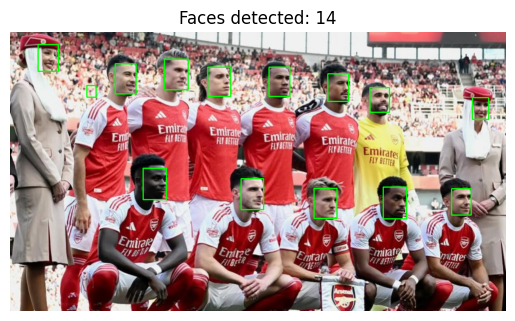

In [ ]:
!pip install mtcnn
from mtcnn import MTCNN
import cv2

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/gambar/104.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inisialisasi detektor MTCNN
detector = MTCNN()

# Deteksi wajah
faces = detector.detect_faces(rgb_img)

# Gambar kotak di sekitar wajah yang terdeteksi
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Tampilkan hasil deteksi
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Faces detected: {len(faces)}')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.9111 - loss: 0.2927 - val_accuracy: 0.9824 - val_loss: 0.0505
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9889 - val_loss: 0.0349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9892 - val_loss: 0.0325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9941 - loss: 0.0191 - val_accuracy: 0.9873 - val_loss: 0.0389
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9902 - val_loss: 0.0330
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00

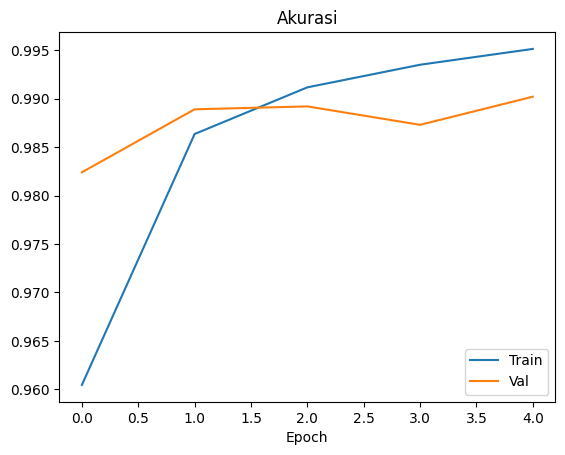

In [ ]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train[..., None]
X_test = X_test[..., None]

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.7663 - loss: 0.6443 - val_accuracy: 0.8620 - val_loss: 0.3795
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.8831 - loss: 0.3248 - val_accuracy: 0.8824 - val_loss: 0.3146
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9005 - loss: 0.2724 - val_accuracy: 0.8898 - val_loss: 0.2952
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 36ms/step - accuracy: 0.9102 - loss: 0.2390 - val_accuracy: 0.8994 - val_loss: 0.2653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9218 - loss: 0.2089 - val_accuracy: 0.9035 - val_loss: 0.2588
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9292 - loss: 0.1907 - val_accuracy: 0.9096 - val_loss: 0.2508
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9367 - loss: 0.1674 - val_accuracy: 0.9087 - val_loss: 0.2635
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9431 -

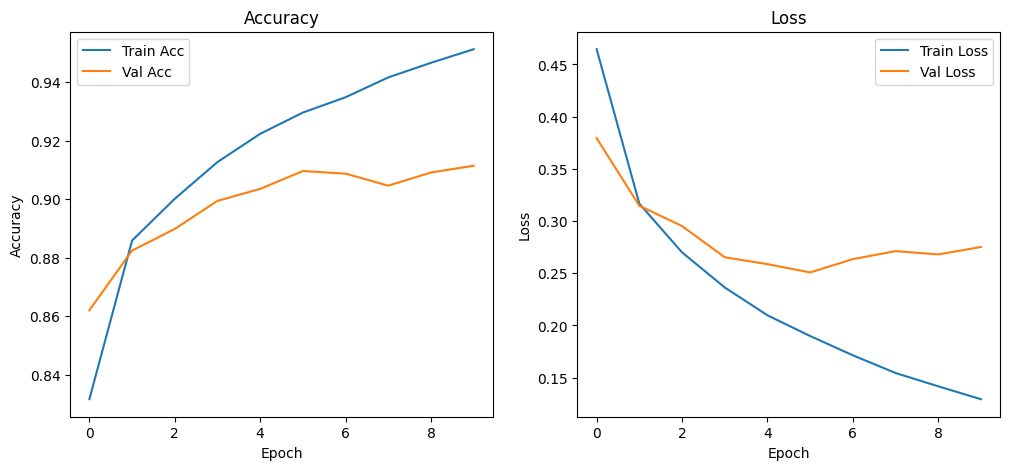

In [ ]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train[..., None]
X_test = X_test[..., None]

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 58ms/step - accuracy: 0.3643 - loss: 1.7310 - val_accuracy: 0.5454 - val_loss: 1.2716
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5832 - loss: 1.1692 - val_accuracy: 0.6225 - val_loss: 1.0566
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 53ms/step - accuracy: 0.6508 - loss: 0.9935 - val_accuracy: 0.6636 - val_loss: 0.9599
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6897 - loss: 0.8877 - val_accuracy: 0.6668 - val_loss: 0.9531
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7187 - loss: 0.7970 - val_accuracy: 0.6891 - val_loss: 0.8987
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7422 - loss: 0.7378 - val_accuracy: 0.7008 - val_loss: 0.8760
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.7615 - loss: 0.6804 - val_accuracy: 0.7075 - val_loss: 0.8578
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7770 

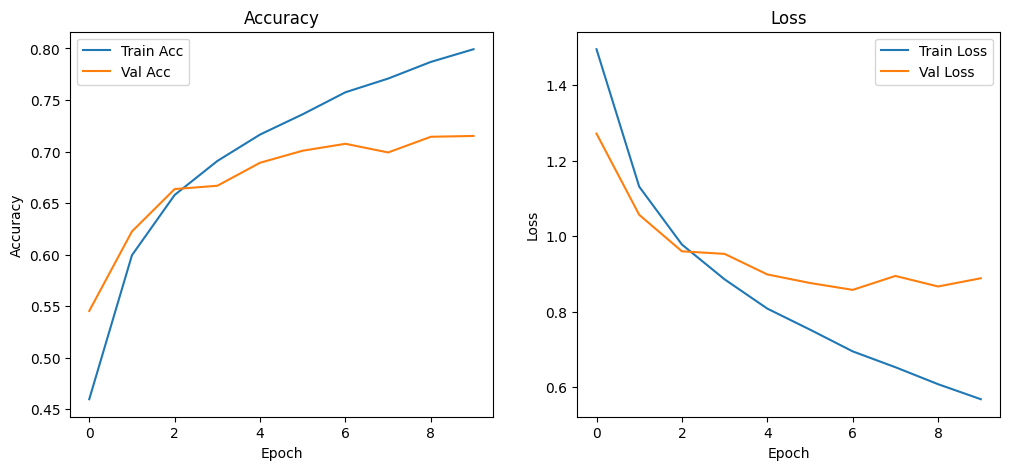

In [ ]:
# 1. Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalisasi
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Bangun Model CNN (lebih kompleks untuk CIFAR-10)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# 4. Evaluasi Model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred_classes))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_classes))

# 5. Grafik
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.9090 - loss: 0.2914 - val_accuracy: 0.9849 - val_loss: 0.0453
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9868 - loss: 0.0421 - val_accuracy: 0.9890 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9917 - loss: 0.0286 - val_accuracy: 0.9855 - val_loss: 0.0466
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9920 - val_loss: 0.0259
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9084 - loss: 0.2983 - val_accuracy: 0.9862 - val_loss: 0.0405
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9866 - loss: 0.0451 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9908 - loss: 0

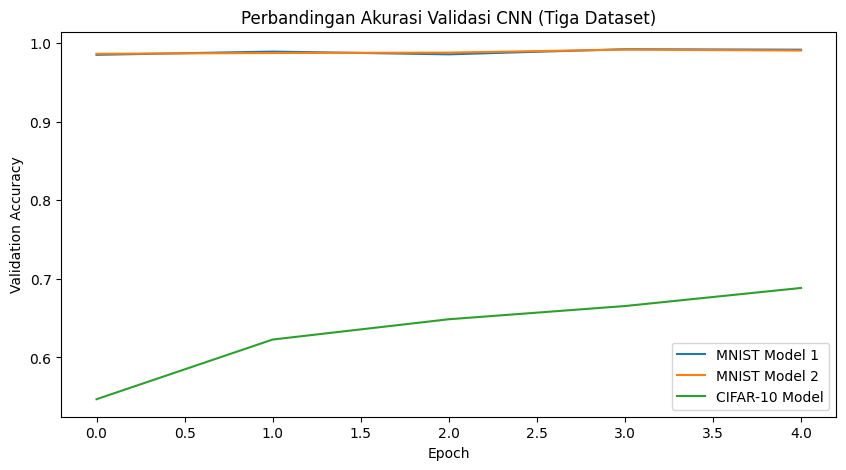

In [ ]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf

# ------------------------------
# 1. MODEL CNN UNTUK MNIST (Model 1)
# ------------------------------
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train[..., None]
X_test = X_test[..., None]

model_mnist_1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_mnist_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_hist_1 = model_mnist_1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


# ------------------------------
# 2. MODEL CNN UNTUK MNIST (Model 2 – sama, tapi dilatih ulang)
# ------------------------------
model_mnist_2 = models.clone_model(model_mnist_1)
model_mnist_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_hist_2 = model_mnist_2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


# ------------------------------
# 3. MODEL CNN UNTUK CIFAR-10
# ------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

model_cifar = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cifar_hist = model_cifar.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))



# ================================
# GRAFIK PERBANDINGAN 3 MODEL CNN
# ================================

plt.figure(figsize=(10,5))
plt.plot(mnist_hist_1.history['val_accuracy'], label="MNIST Model 1")
plt.plot(mnist_hist_2.history['val_accuracy'], label="MNIST Model 2")
plt.plot(cifar_hist.history['val_accuracy'], label="CIFAR-10 Model")

plt.title("Perbandingan Akurasi Validasi CNN (Tiga Dataset)")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()
